# Predict the plants with Images

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import keras
from keras.layers import Input,Dense,Flatten,Conv2D,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import image_dataset_from_directory
from keras import models
from keras import Model

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
train = ImageDataGenerator(rescale=1./255)
test = ImageDataGenerator(rescale=1./255)
valid = ImageDataGenerator(rescale=1./255)

In [8]:
traing=train.flow_from_directory('/kaggle/input/plants-classification/train',target_size=(256,256),class_mode="sparse",batch_size=32)
testg=test.flow_from_directory('/kaggle/input/plants-classification/test',target_size=(256,256),class_mode="sparse",batch_size=32)

validg=valid.flow_from_directory('/kaggle/input/plants-classification/val',target_size=(256,256),class_mode="sparse",batch_size=32)


Found 21000 images belonging to 30 classes.
Found 6000 images belonging to 30 classes.
Found 3000 images belonging to 30 classes.


# model Building with functional API architecture

In [9]:
inputs = Input(shape=(256,256,3))
x1 = Conv2D(80,(3,3),strides=(1,1),padding="valid",activation="relu")(inputs)
x2 = MaxPooling2D(pool_size=(2,2),strides=(2,2))(x1)

x3 = Conv2D(70,(3,3),strides=(1,1),padding="valid",activation="relu")(x2)
x4 = MaxPooling2D(pool_size=(2,2),strides=(2,2))(x3)

x5 = Conv2D(50,(3,3),strides=(1,1),padding="valid",activation="relu")(x4)
x6 = MaxPooling2D(pool_size=(2,2),strides=(2,2))(x5)

x7 = Conv2D(50,(3,3),strides=(1,1),padding="valid",activation="relu")(x6)
x8 = MaxPooling2D(pool_size=(2,2),strides=(2,2))(x7)

# flatten layer
flat = Flatten()(x8)

# dense layers

d1= Dense(150,activation="relu")(flat)
d2= Dense(100,activation="relu")(d1)
d3=Dense(70,activation='relu')(d2)
d4=Dense(50,activation='relu')(d3)



outputs= Dense(30,activation="softmax")(d4)
model1 = Model(inputs=inputs,outputs=outputs)


In [10]:
model1.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 80)      2240      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 80)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 70)      50470     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 70)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 50)        31550 

In [11]:
model1.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])


In [12]:
history = model1.fit(traing,epochs=5,steps_per_epoch=21000//32,validation_data=validg,validation_steps=3000//32)


Epoch 1/5
656/656 [==============================] - 260s 378ms/step - loss: 3.4093 - accuracy: 0.0318 - val_loss: 3.4012 - val_accuracy: 0.0336
Epoch 2/5
656/656 [==============================] - 80s 122ms/step - loss: 3.4027 - accuracy: 0.0316 - val_loss: 3.4012 - val_accuracy: 0.0333
Epoch 3/5
656/656 [==============================] - 80s 122ms/step - loss: 3.4020 - accuracy: 0.0282 - val_loss: 3.4012 - val_accuracy: 0.0336
Epoch 4/5
656/656 [==============================] - 80s 121ms/step - loss: 3.4016 - accuracy: 0.0299 - val_loss: 3.4012 - val_accuracy: 0.0333
Epoch 5/5
656/656 [==============================] - 80s 122ms/step - loss: 3.4016 - accuracy: 0.0308 - val_loss: 3.4012 - val_accuracy: 0.0336


In [13]:
import matplotlib.pyplot as plt

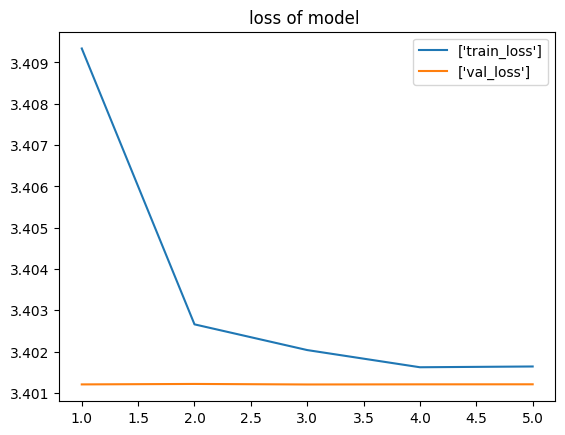

In [14]:
plt.plot(range(1,6),history.history['loss'],label=['train_loss'])

plt.plot(range(1,6),history.history['val_loss'],label=['val_loss'])
plt.title("loss of model ")


plt.legend()

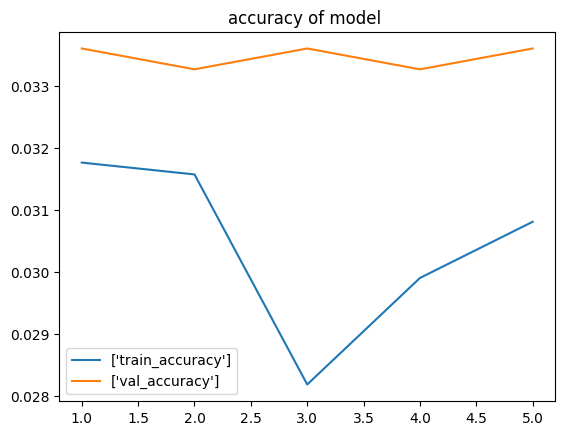

In [15]:
plt.plot(range(1,6),history.history['accuracy'],label=['train_accuracy'])

plt.plot(range(1,6),history.history['val_accuracy'],label=['val_accuracy'])
plt.title("accuracy of model ")

plt.legend()

In [17]:
# prediction
predicted_yi = model1.predict(testg)

# converting the probabilities
final_predicted_yi = np.argmax(predicted_yi,axis=1)

from sklearn.metrics import accuracy_score,classification_report
accuracy_score(final_predicted_yi,testg.labels)


188/188 [==============================] - 19s 99ms/step


0.03333333333333333

# model saving


In [18]:
model1.save(r"plant_12_prediction",save_format="h5")

In [22]:
from keras.models import load_model
model_2 = load_model(r"plant_12_prediction")

In [23]:
model_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 80)      2240      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 80)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 70)      50470     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 70)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 50)        31550 